In [1]:
!pip install -q keras-ocr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 62.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 813.9/813.9 kB 62.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 8.3 MB/s eta 0:00:00


In [2]:
import keras_ocr
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [3]:
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5


In [14]:
images = [
    keras_ocr.tools.read(img) for img in ['/content/S1013891.JPG',
                                          '/content/S1013810.JPG']
]

In [15]:
# generate text predictions from the images
prediction_groups = pipeline.recognize(images)

1/1 [==============================] - 0s 41ms/step


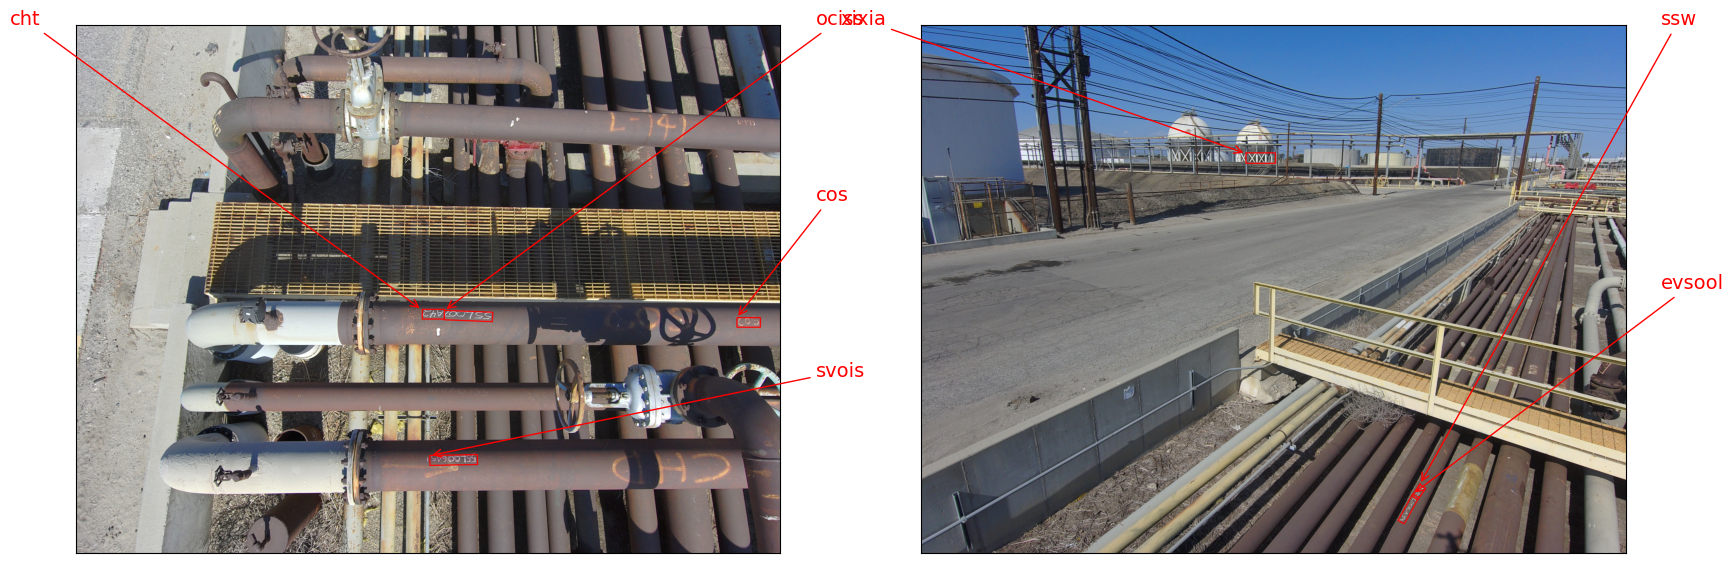

In [17]:
# plot the text predictions
fig, axs = plt.subplots(nrows=1,ncols=len(images), figsize=(20, 10))
for ax, image, predictions in zip(axs, images, prediction_groups):
    keras_ocr.tools.drawAnnotations(image=image,
                                    predictions=predictions,
                                    ax=ax)

In [11]:
predicted_image = prediction_groups[0]
for text, bbox in predicted_image:
    print(text,bbox)


cht [[1992.3516 1639.8281]
 [2119.1016 1639.8281]
 [2119.1016 1695.2812]
 [1992.3516 1695.2812]]
ociss [[2119.5151 1645.1257]
 [2398.0613 1656.0491]
 [2395.911  1710.874 ]
 [2117.365  1699.9508]]
cos [[3802.5    1687.3594]
 [3937.1719 1687.3594]
 [3937.1719 1742.8125]
 [3802.5    1742.8125]]
svois [[2035.3037 2479.7146]
 [2308.8918 2474.35  ]
 [2310.0134 2531.5676]
 [2036.4254 2536.9321]]


In [18]:
text_dict = {}
texts = []
for id,img in enumerate(prediction_groups):
    for text,bbox in img:
        texts.append(text)
    text_dict[id] = texts
    texts = []

In [23]:
import pandas as pd
pd.DataFrame.from_dict(text_dict,orient='index').transpose()

0       1
0    cht   xixia
1  ociss     ssw
2    cos  evsool
3  svois    None

In [24]:
images_flippd = [cv2.flip(img,90) for img in images]

In [25]:
# generate text predictions on flipped images
prediction_groups = pipeline.recognize(images_flippd)

1/1 [==============================] - 0s 51ms/step


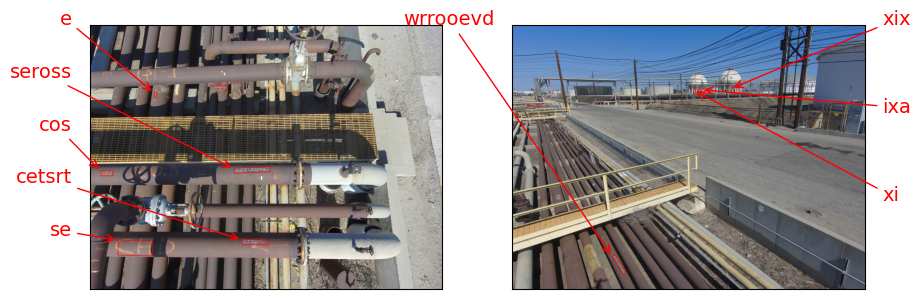

In [26]:
# plot the text predictions
fig, axs = plt.subplots(nrows=1,ncols=len(images), figsize=(10, 20))
for ax, image, predictions in zip(axs, images_flippd, prediction_groups):
    keras_ocr.tools.drawAnnotations(image=image,
                                    predictions=predictions,
                                    ax=ax)

### EasyOCR


In [1]:
!pip3 install easyocr -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 62.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 813.9/813.9 kB 46.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.0/146.0 kB 18.5 MB/s eta 0:00:00


In [2]:
import os
import easyocr
import cv2
from matplotlib import pyplot as plt
import numpy as np

In [27]:
img_path = ['/content/S1013810.JPG','/content/S1013891.JPG']
reader = easyocr.Reader(['en'])
result1 = reader.readtext(image=img_path[0],
                         paragraph=False
                         #rotation_info=[90, 180 ,270]
                         )
result2 = reader.readtext(image=img_path[1],paragraph=False)
result1

[([[2868.108403009821, 2635.3716243857325],
   [2906.2206787289138, 2656.1754440094146],
   [2777.891596990179, 2874.6283756142675],
   [2739.7793212710862, 2853.8245559905854]],
  'J',
  0.10117204767142596)]

In [64]:
#visualizing the result
def plot(result,img_path,flip=False):
    #top_left = tuple(np.int32(result[0][0][0]))
    #bottom_right = tuple(np.int32(result[0][0][2]))
    #text = result[0][1]
    font = cv2.FONT_HERSHEY_SIMPLEX
    if flip:
        img = cv2.flip(cv2.imread(img_path),-180)
    else:
        img = cv2.imread(img_path)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    spacer = 100
    for detection in result:
        top_left = tuple(np.int32(detection[0][0]))
        bottom_right = tuple(np.int32(detection[0][2]))
        text = detection[1]
        img = cv2.rectangle(img,top_left,bottom_right,(0,255,0),4)
        img = cv2.putText(img,text,(50,spacer), font, 4,(0,255,0),4,cv2.LINE_AA)
        spacer+=75
    plt.figure(figsize=(10,10))
    plt.imshow(img)
    plt.show()

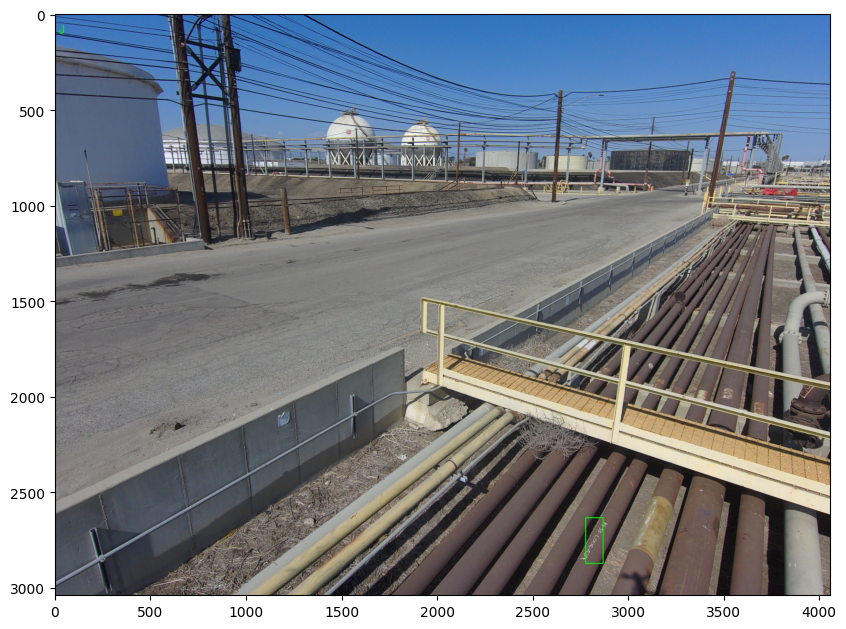

In [50]:
plot(result1,img_path[0])

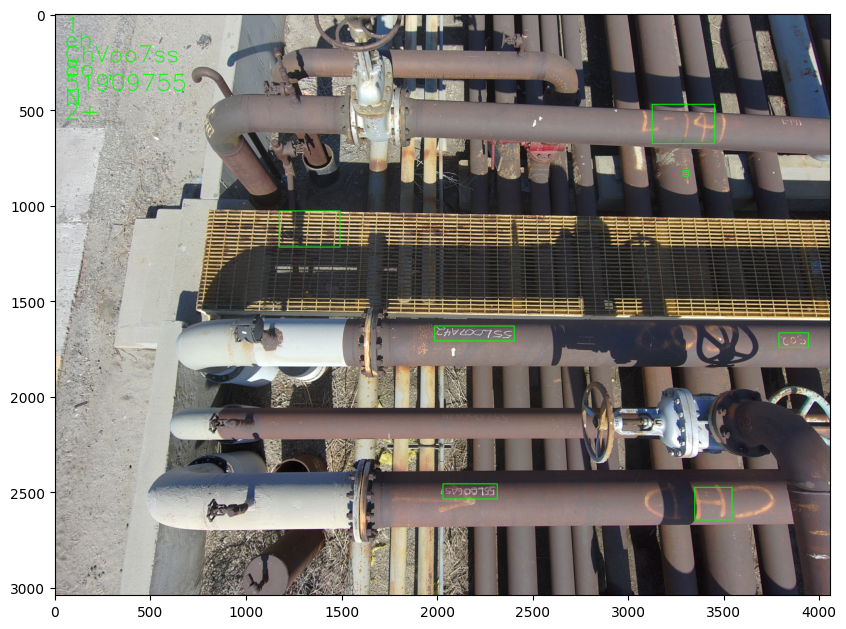

In [60]:
plot(result2,img_path[1])

### effect of flipping the image

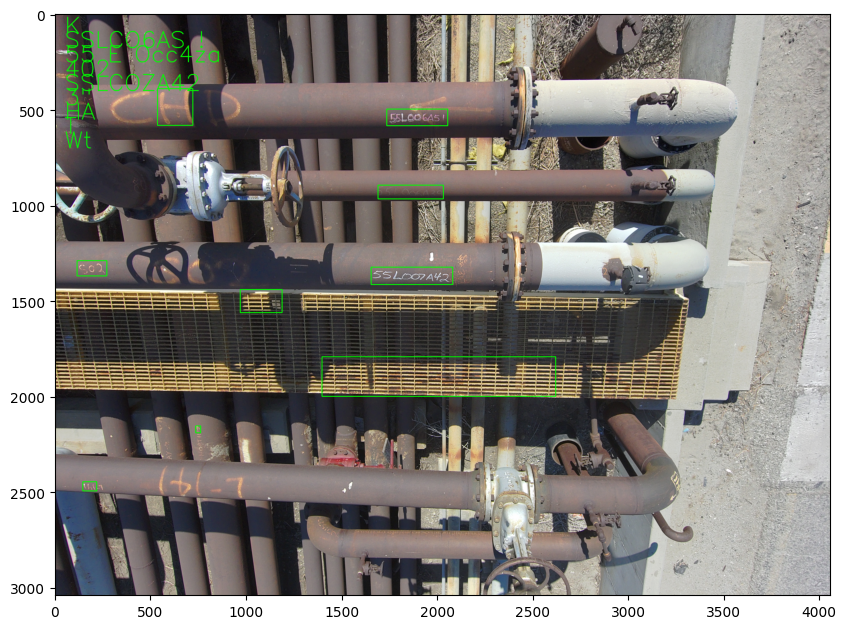

In [66]:
img = cv2.flip(cv2.imread(img_path[1]),-180)
result = reader.readtext(image=img,paragraph=False)
plot(result,img_path[1],True)


## Tesseract OCR

In [ ]:
!pip install pytesseract

In [ ]:
!mkdir /content/setup

mkdir: cannot create directory ‘/content/setup’: File exists


In [ ]:
!pip install tesseract

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.6/45.6 MB 11.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for tesseract: filename=tesseract-0.1.3-py3-none-any.whl size=45562552 sha256=389759945e314f2d92d5d3ad835b8035f3f251b282997da95a91ff35b9757e87
  Stored in directory: /root/.cache/pip/wheels/71/c9/aa/698c579693e83fdda9ad6d6f0d8f61ed986e27925ef576f109
Successfully built tesseract


In [ ]:
import pytesseract
import re
path = r'/opt/homebrew/Cellar/tesseract/5.3.1_1/bin/tesseract'
path1 = r'\usr\local\Cellar\tesseract\5.3.1_1\bin\tesseract'
pytesseract.pytesseract.tesseract_cmd = path


In [ ]:
import cv2

In [ ]:
img = cv2.imread('/content/S1013810.JPG')
text = pytesseract.image_to_string(img)
text